# Cборный проект №1

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Передо мной данные до 2016 года. Представим, что сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Отрабатываю принцип работы с данными.

## Знакомство с данным

In [1]:
# импортирую бибилиотеки, которыми собираюсь пользоваться
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px

try:
    df = pd.read_csv('/datasets/games.csv', sep=',')
except:
    df = pd.read_csv('games.csv')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

Сразу наблюдаем неправославные названия столбцов. Приведу в приличный вид, чтобы дальше было удобнее работать

In [2]:
# столбцы с региональными продажами приводить к нижнему регистру не буду, т.к. логичнее, когда аббревиатуры пишутся заглавными буквами
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.head(10)

name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

Теперь дела с логикой названий обстоят намного лучше, что облегчит дальнейшую работу. Очевидно, что в данных существуют некоторые другие проблемы, но с ними мы будем разбираться далее

## Преодобработка данных

### Пропуски

Есть некторые вопросы к типу данных в year_of_release, critic_score и user_score

In [3]:
#посмотрим на все значения, которые представлены в данных столбцах, вероятно, некоторые из них доставят нам проблемы
display(df['year_of_release'].unique())
display(df['critic_score'].unique())
display(df['user_score'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

А вот и проблемы:
* Во всех столбцах есть значения nan, что, в данном контексте, скорее всего, означает отсутсвие данных о годе/рейтинге. Логично заменить на уже встречающееся далее tbd (to be decided). Возможно, некоторые проекты вообще отменены...
*  В столбце с оценкой критиков - все оценки целые, значит тип лучше заменить на целый. У user_score лучше заменить на дробный

In [4]:
#df[df['critic_score'].isna().fillna('tbd')]
#df[df['user_score'].isna().fillna('tbd')]
#df[df['year_of_release'].isna()]

С пропущенными годами непонятно, таких строк немного, поэтому их предлагаю отбросить

In [5]:
df= df.dropna(subset=['year_of_release'])
df= df.dropna(subset=['name']) # также и с пропущенными названиями

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Изменение типов данных

In [7]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


Всё, что нужно удалили/заменили. Имеем вполне себе готовый к анализу датасет

In [8]:
df['rating'].fillna('not_NA', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


### Расчёт суммарных продаж

In [9]:
df['world_sales'] = df[['NA_sales','EU_sales','JP_sales','other_sales']].sum(axis = 1)

## Исследовательский анализ данных

### Количество проектов по годам

<AxesSubplot:title={'center':'Количество проектов по годам'}, xlabel='Год', ylabel='Количество проектов'>

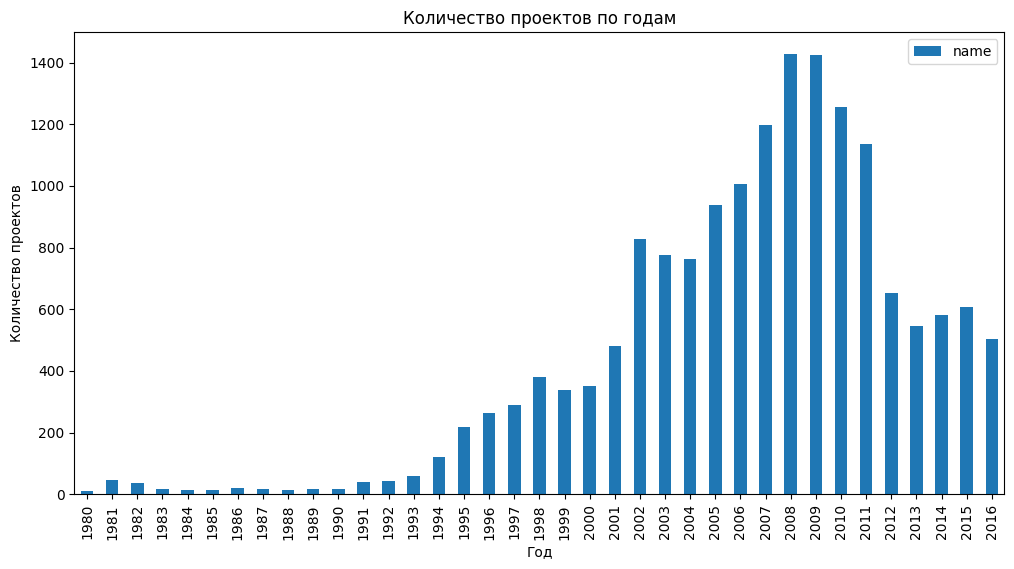

In [10]:
df.groupby(['year_of_release'])['name'].count().reset_index().plot(x='year_of_release', y='name', kind='bar', stacked='True', title = 'Количество проектов по годам', xlabel='Год', ylabel='Количество проектов',figsize=(12, 6))

По количеству проектов как-то всё печальнее становится в последние годы. Скорее всего, дело в том, что пошла мода делать большие/дорогие игры.

In [11]:
df = df[(df['year_of_release'] > 1990) | (df['year_of_release'].isna())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16223 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16223 non-null  object 
 1   platform         16223 non-null  object 
 2   year_of_release  16223 non-null  Int64  
 3   genre            16223 non-null  object 
 4   NA_sales         16223 non-null  float64
 5   EU_sales         16223 non-null  float64
 6   JP_sales         16223 non-null  float64
 7   other_sales      16223 non-null  float64
 8   critic_score     7981 non-null   Int64  
 9   user_score       7461 non-null   float64
 10  rating           16223 non-null  object 
 11  world_sales      16223 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB


### Продажи по платформам

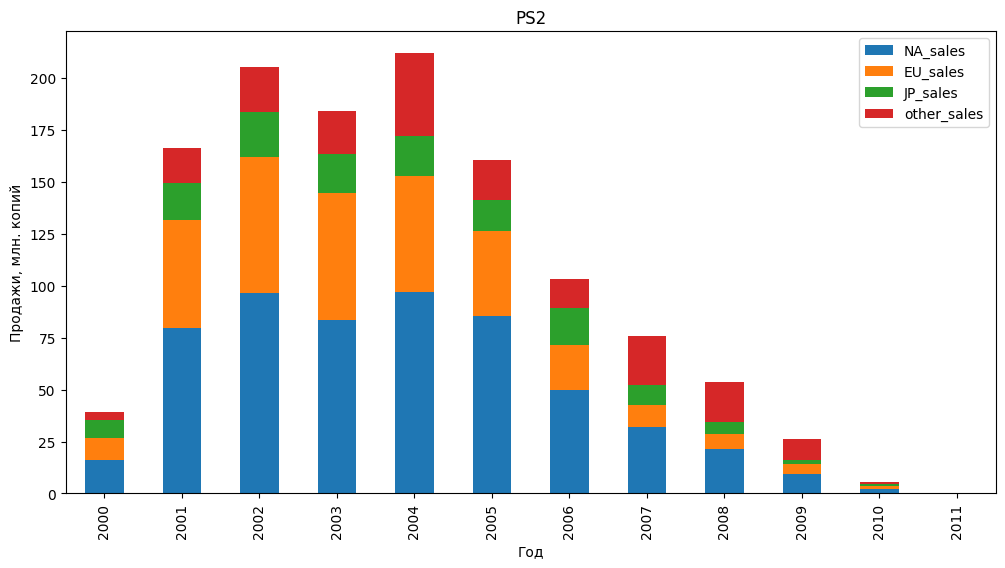

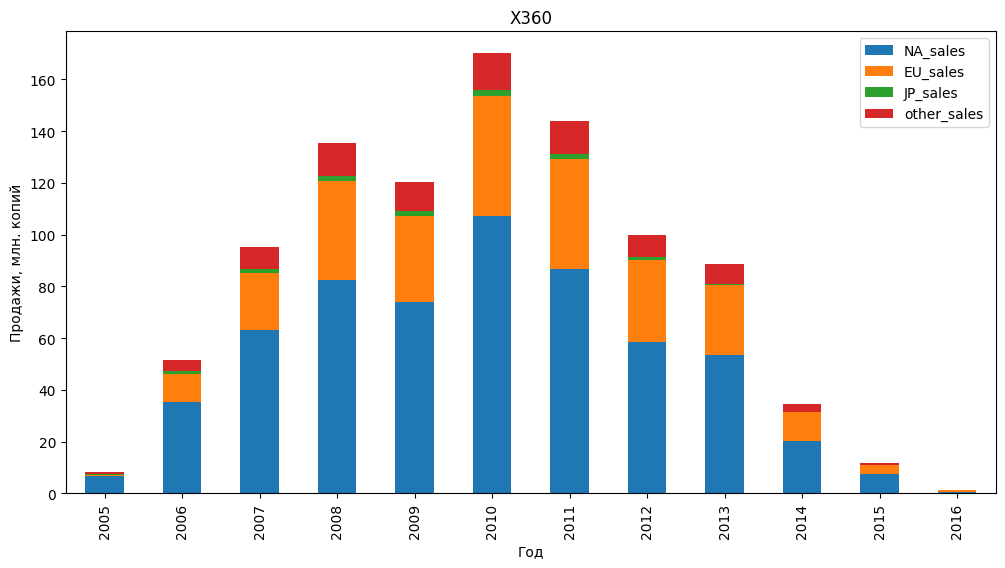

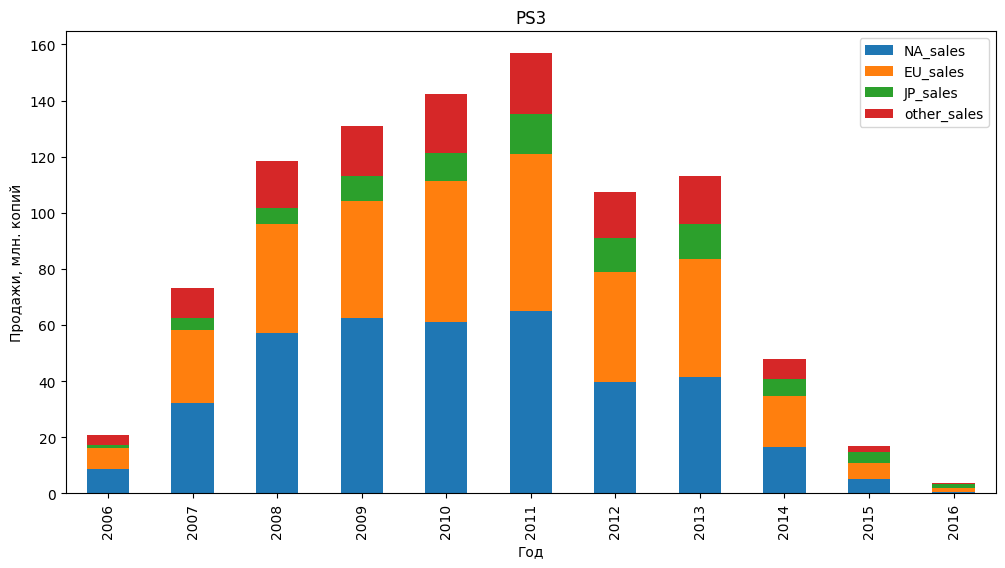

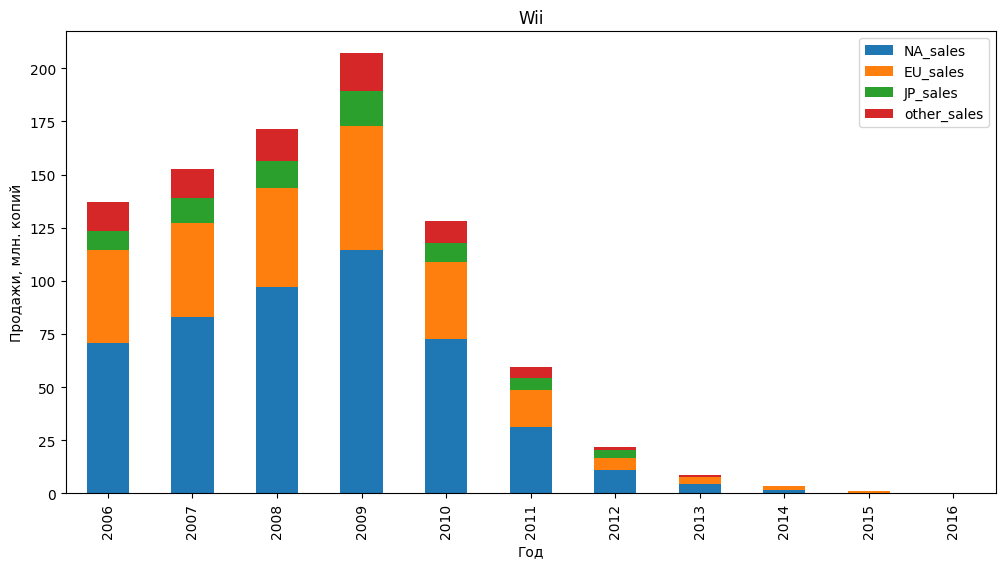

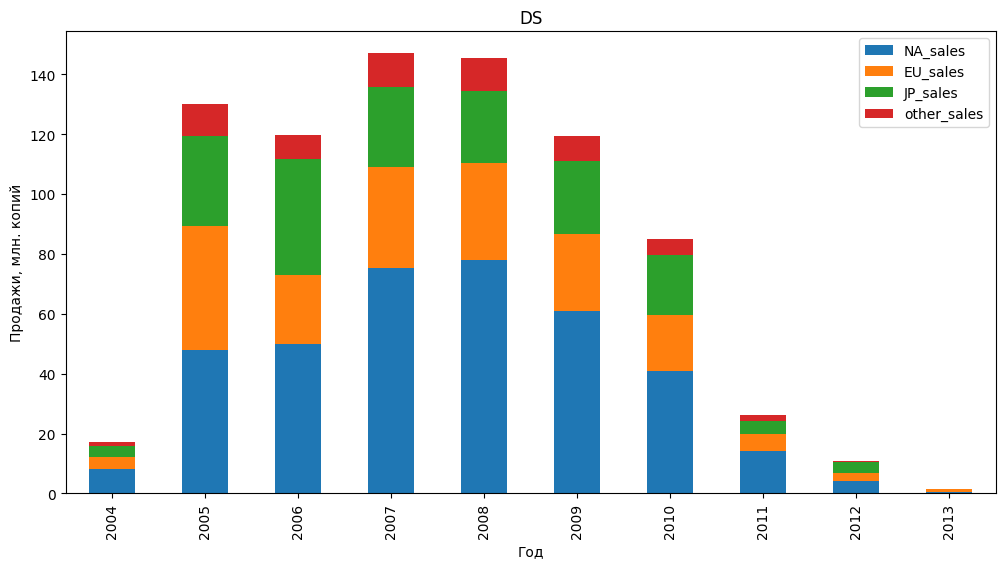

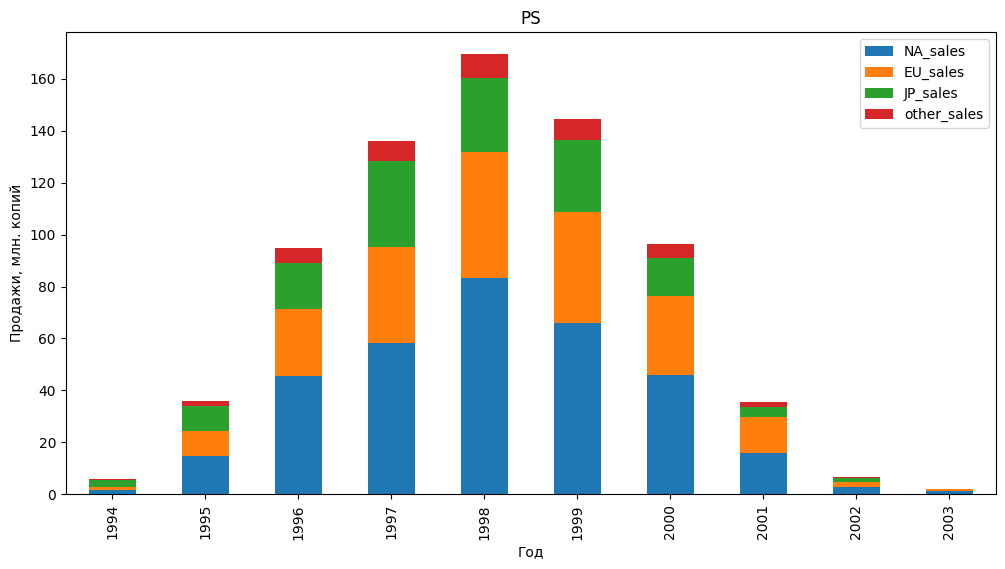

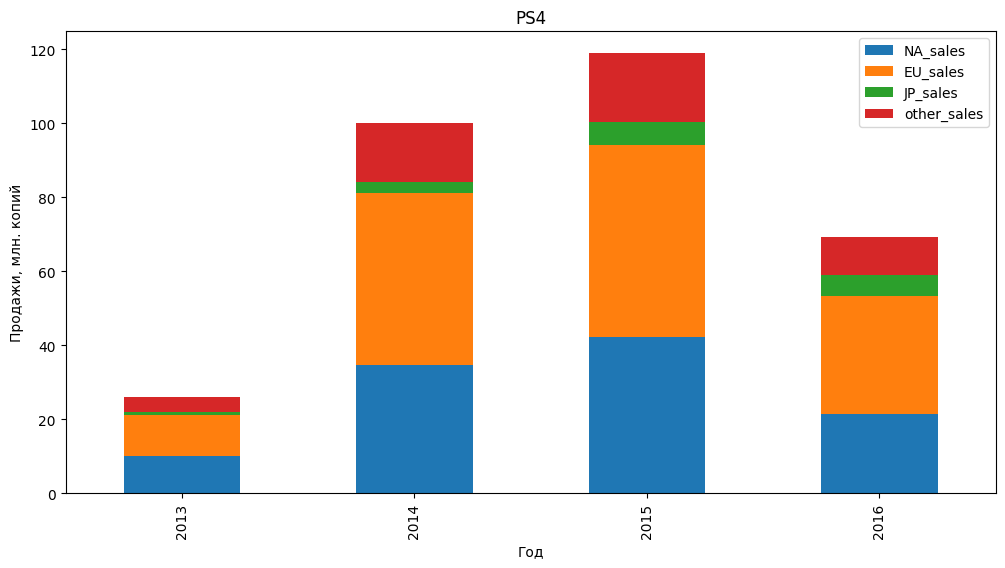

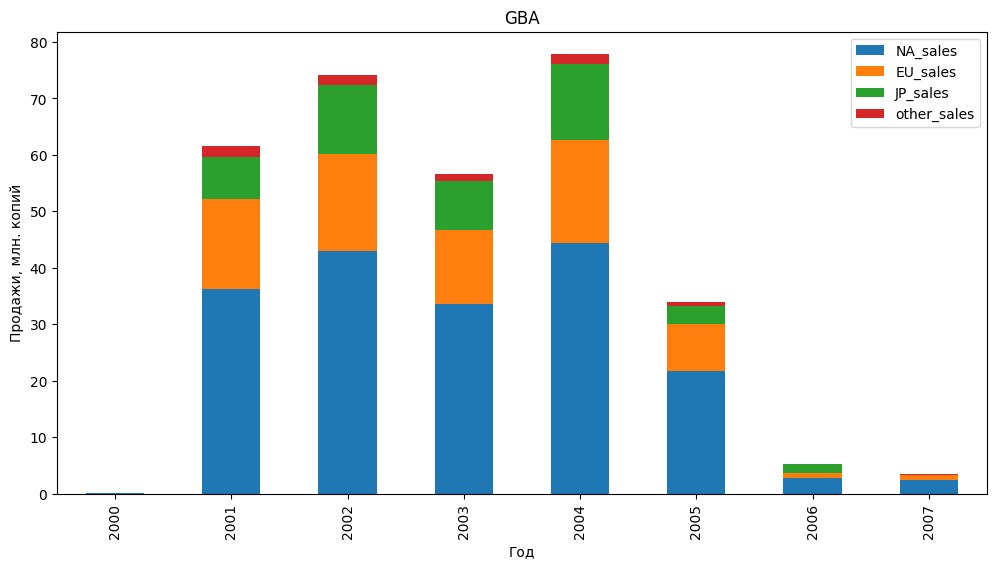

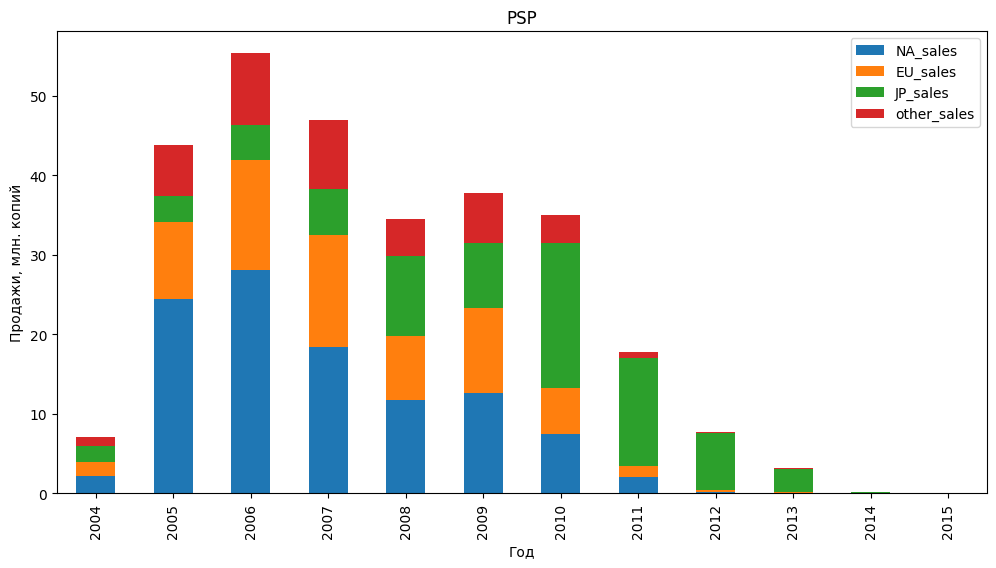

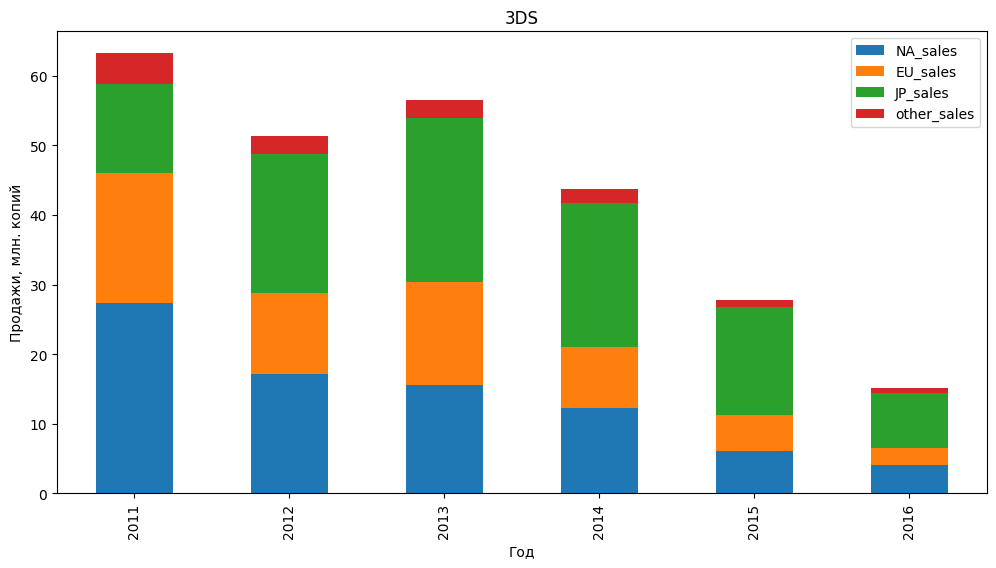

In [12]:
import warnings
warnings.filterwarnings("ignore") 
# посмотрим, что за платформы у нас в наличии и добавим топ-10 в список
platform10 = df.pivot_table(index = 'platform', values = 'world_sales', aggfunc = 'sum').sort_values(by='world_sales', ascending=False).head(10)
# построим графики для каждой платформы
for i in range(len(platform10.index)):
    (
        df[df['platform'] == platform10.index[i]]
        .groupby(['year_of_release'])['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']
        .sum().reset_index()
        .plot(
            x='year_of_release', y=['NA_sales', 'EU_sales', 'JP_sales', 'other_sales'],
            kind='bar', stacked='True', xlabel='Год', ylabel='Продажи, млн. копий', figsize=(12, 6), legend=True)
        .set_title(platform10.index[i])
    )

Из графиков следует, что в среднем, все платформы живут не более 8-9 лет. Для построения прогноза возьмём всё-таки года с 2014 по 2016 - так называемый рассвет 8-го поколения консолей

In [13]:
# делаем срез актуальных данных
df = df[(df['year_of_release'] > 2013) & (df['year_of_release'] < 2017)]

### Актуальные платформы

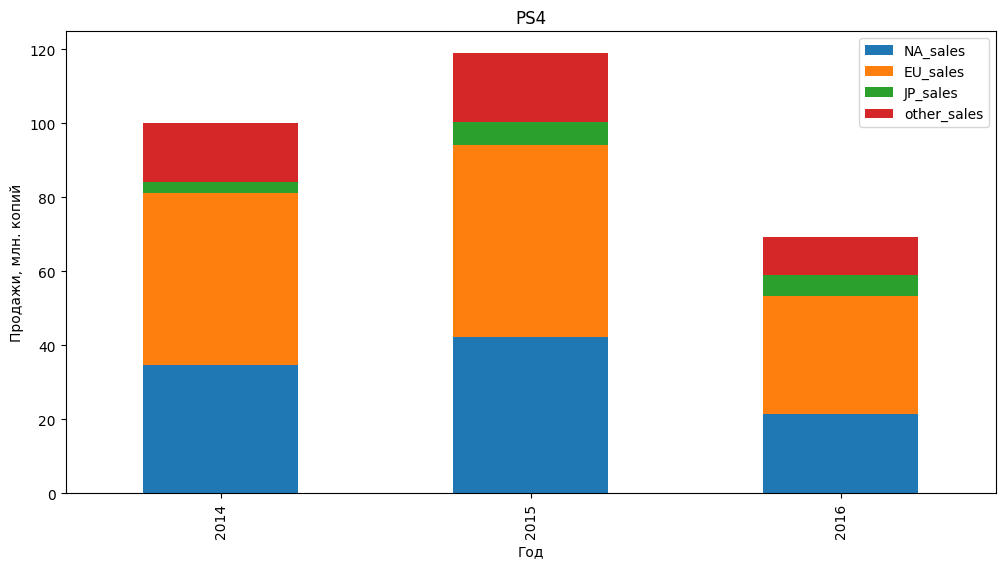

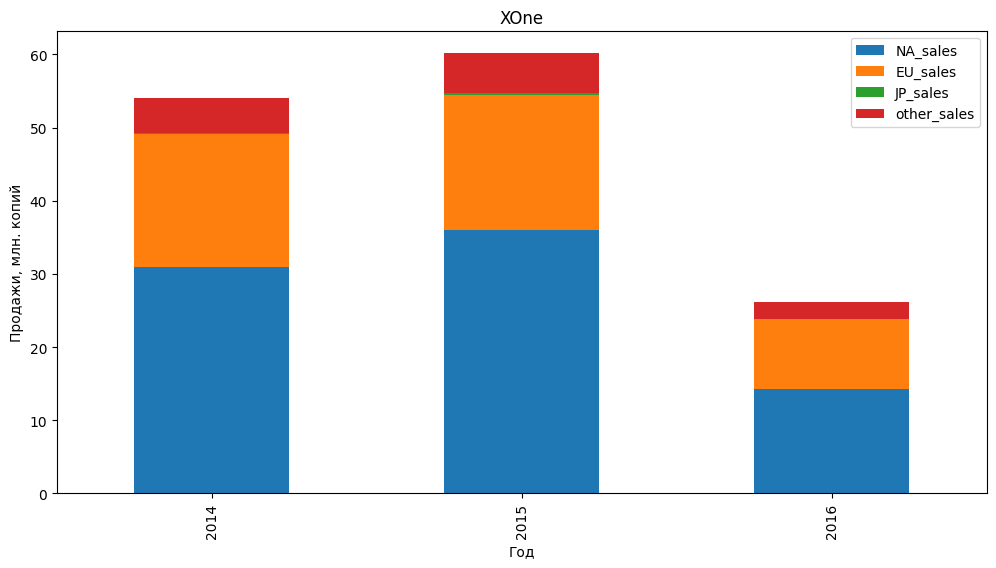

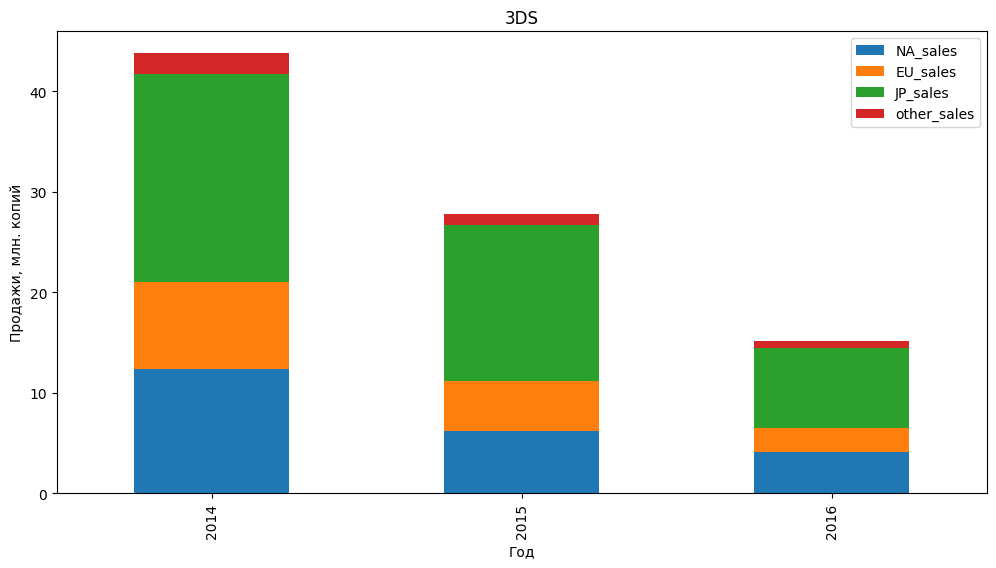

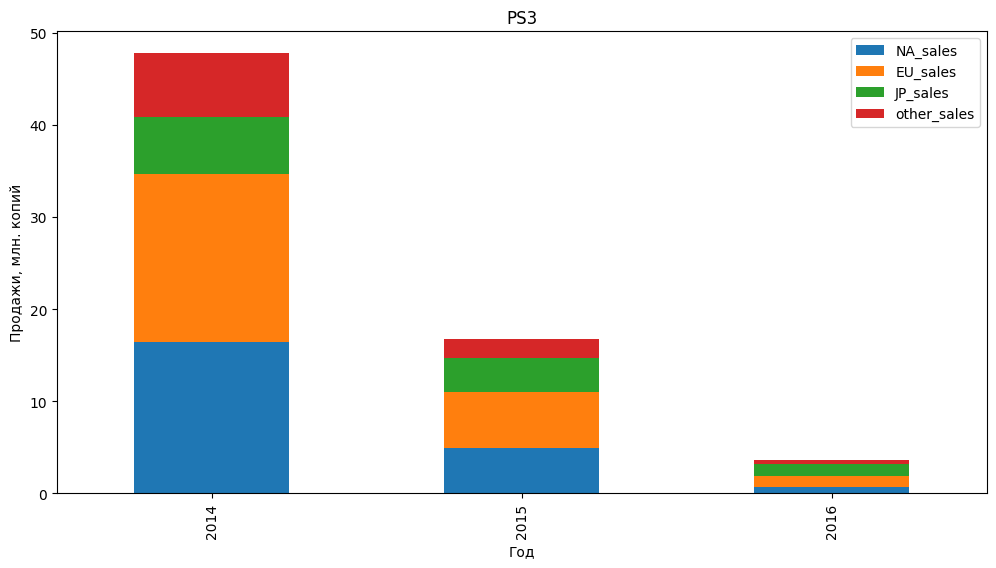

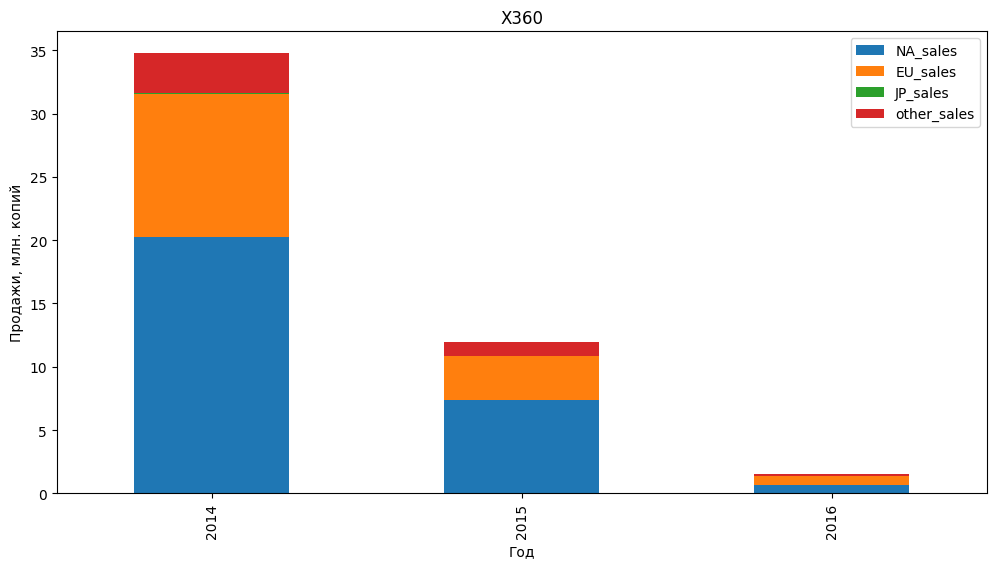

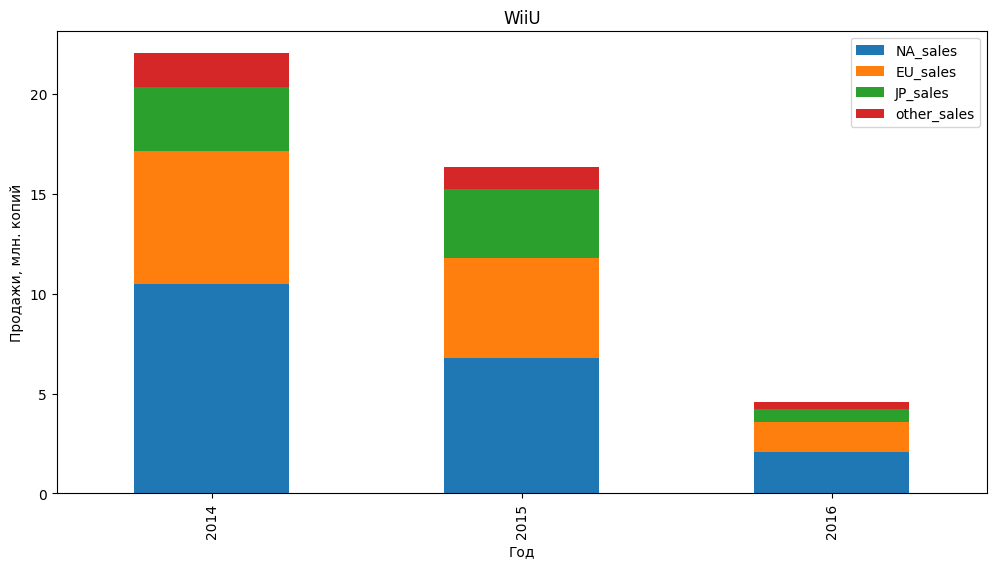

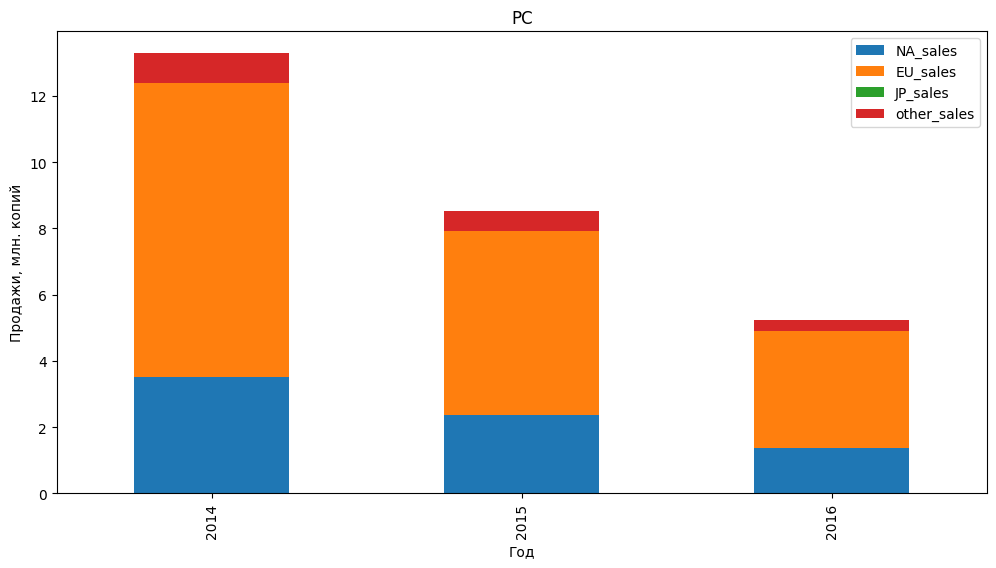

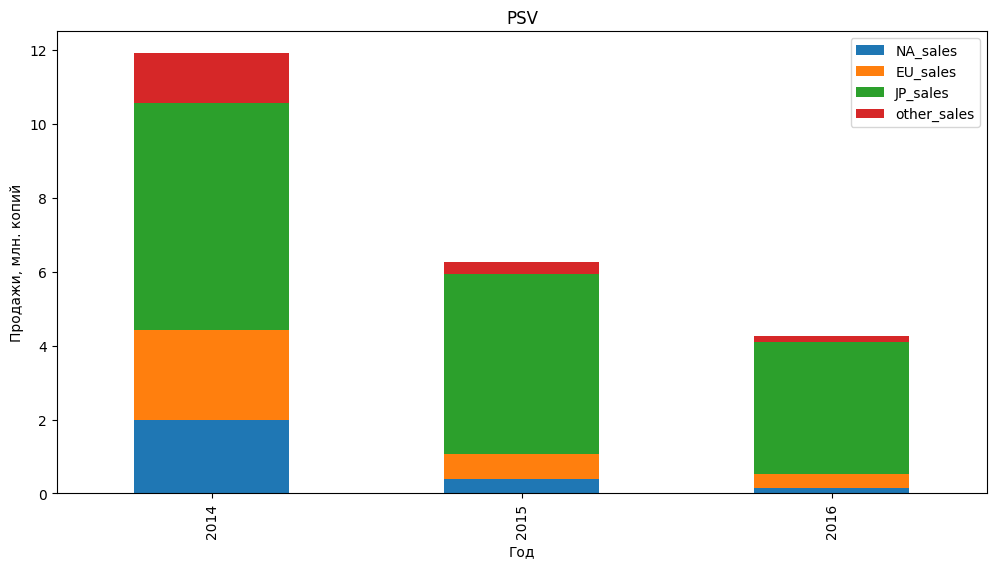

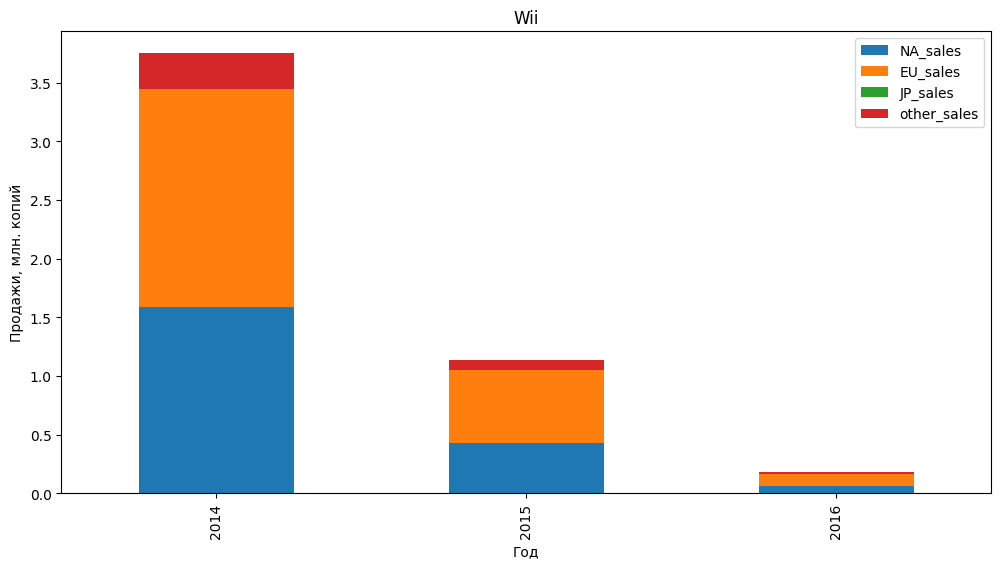

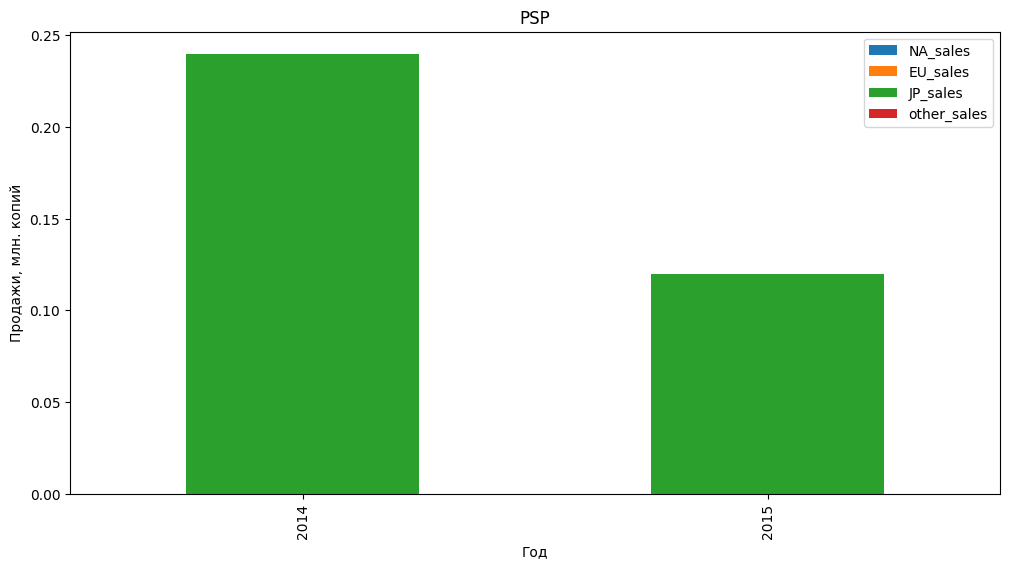

In [14]:

# посмотрим, что за платформы у нас в наличии и добавим топ-10 в список
platform10new = df.pivot_table(index = 'platform', values = 'world_sales', aggfunc = 'sum').sort_values(by='world_sales', ascending=False).head(15)
# построим графики для каждой платформы
for i in range(len(platform10new.index)):
    (
        df[df['platform'] == platform10new.index[i]]
        .groupby(['year_of_release'])['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']
        .sum().reset_index()
        .plot(
            x='year_of_release', y=['NA_sales', 'EU_sales', 'JP_sales', 'other_sales'],
            kind='bar', stacked='True', xlabel='Год', ylabel='Продажи, млн. копий',figsize=(12, 6), legend=True)
        .set_title(platform10new.index[i])
    )

Лидерами падений можно смело считать: PS3, X360, Wii, DS, PSP, PSV (будущее этой красавицы я знаю, т.к сам являюсь её владельцем), PS2 давно всё.
Надежды подают: PS4, XOne, PC (вечно жив, хотя я фанат PS)

In [15]:
# сделаем датасет только с актуальными платформами
df_actual = df[(df['platform'] == 'PS4') | (df['platform'] == 'XOne') | (df['platform'] == 'PC') | (df['platform'] == '3DS') | (df['platform'] == 'X360') | (df['platform'] == 'PS3') | (df['platform'] == 'WiiU') | (df['platform'] == 'PSV')]
df_not_actual = df[(df['platform'] != 'PS4') | (df['platform'] != 'XOne') | (df['platform'] != 'PC') | (df['platform'] != '3DS') | (df['platform'] != 'X360') | (df['platform'] != 'PS3') | (df['platform'] != 'WiiU') | (df['platform'] != 'PSV')]
#df_actual.info()

Не так-то много данных осталось, но зато точно можно быть уверенным, что продажи игр для этих платформ, возможно, будут держаться на том же уровне

### Диаграммы размаха по платформам

In [16]:
#df.boxplot('world_sales', by = 'platform', ylabel='Продажи', title='Диаграмма размаха', figsize=(12,5))
fig = px.box(df_actual, x='platform', y="world_sales", labels={"platform": "Платформа", "world_sales": "Продажи, млн. копий"}, title='Диаграмма размаха')
fig.update_layout(yaxis_range=[0,3])
fig.show()

Судя по усатым ящикам, можно судить, что лучше всего продаются тайтлы с PS4 (она намного популярнее), чуть хуже XOne, и хуже всех PC (тут я полагаю, виновато пиратство, ведь Denuvo ещё не было). Также, на всех платформах есть тайтлы, продающиеся значительно лучше, чем большинство (GTA V, например) - в данном случае, это вряд-ли выбросы

### Диаграммы рассеяния. Продажи и отзывы

В данном разрезе предлагаю смотреть актуальные платформы 8-го поколения и платформы показывающие хорошие продажи в последние годы

world_sales  critic_score  user_score
world_sales      1.000000      0.402661   -0.040132
critic_score     0.402661      1.000000    0.546434
user_score      -0.040132      0.546434    1.000000

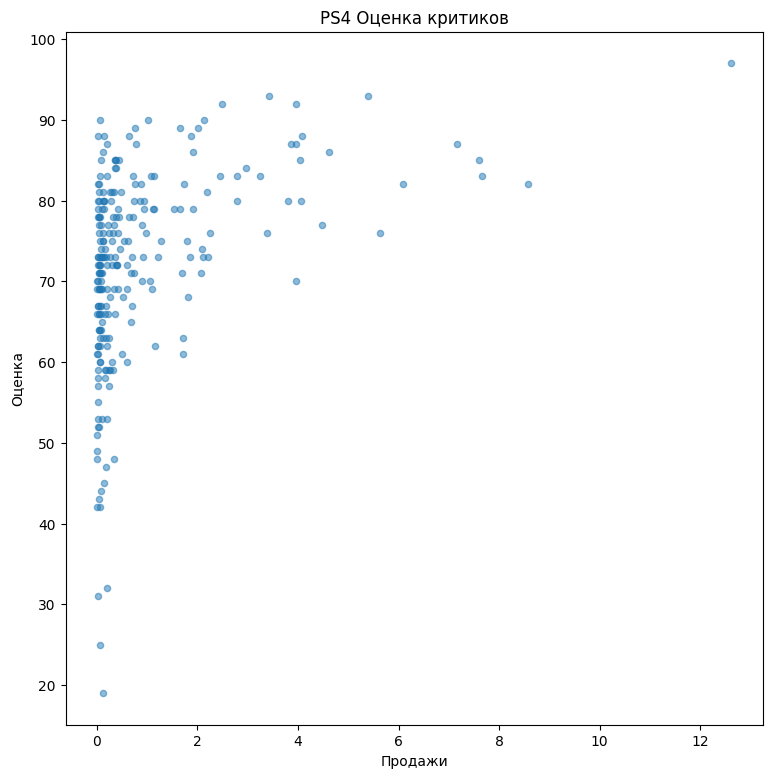

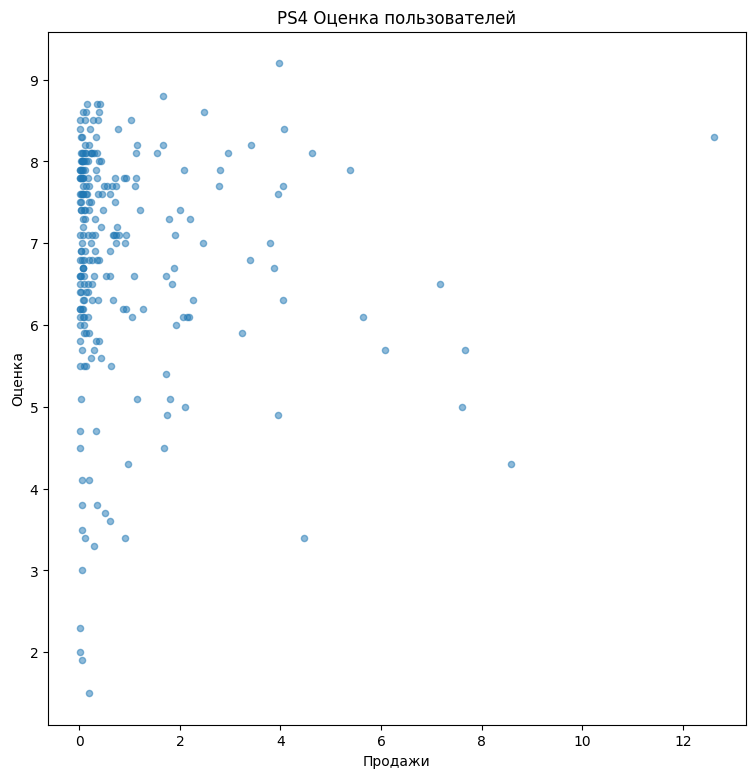

In [17]:
corr_list = list(['platform', 'world_sales', 'critic_score', 'user_score'])
# построим графики для каждой платформы
df_actual.query('platform == "PS4"').plot(x='world_sales', y='critic_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'PS4 Оценка критиков', figsize=(9, 9), alpha=0.5)
df_actual.query('platform == "PS4"').plot(x='world_sales', y='user_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'PS4 Оценка пользователей', figsize=(9, 9), alpha=0.5)
df_actual[corr_list].query('platform == "PS4"').corr()

Владельцы PS4 чаще обращают внимание на оценки критиков, чем на оценки пользователей

world_sales  critic_score  user_score
world_sales      1.000000      0.314117    0.215193
critic_score     0.314117      1.000000    0.862485
user_score       0.215193      0.862485    1.000000

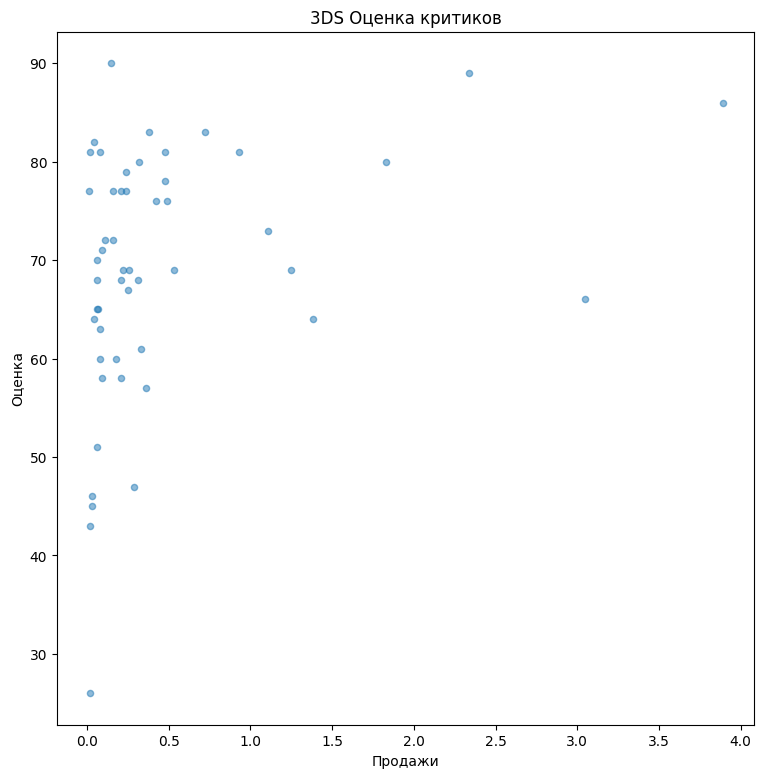

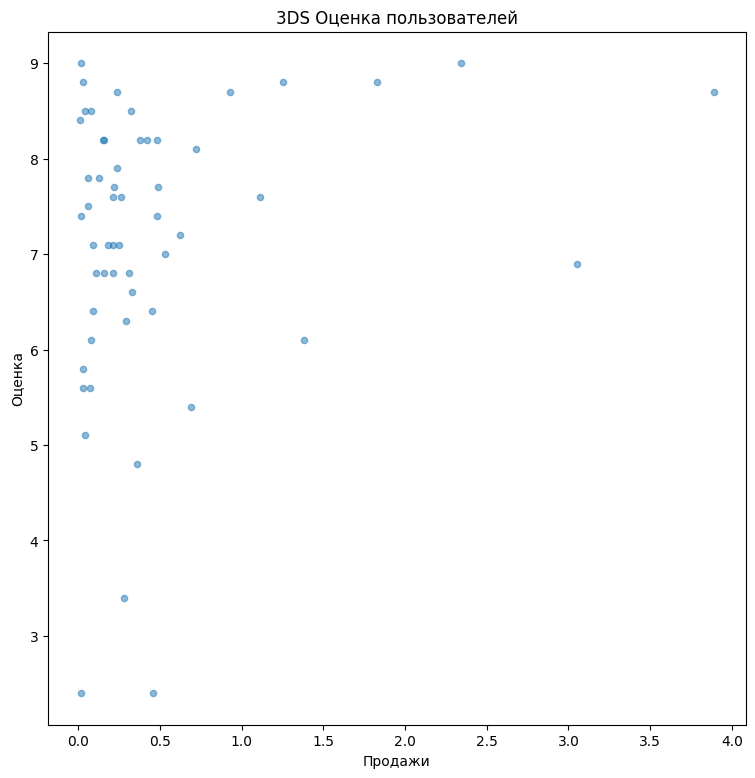

In [18]:
df_actual.query('platform == "3DS"').plot(x='world_sales', y='critic_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = '3DS Оценка критиков', figsize=(9, 9), alpha=0.5)
df_actual.query('platform == "3DS"').plot(x='world_sales', y='user_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = '3DS Оценка пользователей', figsize=(9, 9), alpha=0.5)
df_actual[corr_list].query('platform == "3DS"').corr()

Ситуация похожая, только оценки пользователей подстёгивают продажи

world_sales  critic_score  user_score
world_sales      1.000000      0.428677   -0.070384
critic_score     0.428677      1.000000    0.440977
user_score      -0.070384      0.440977    1.000000

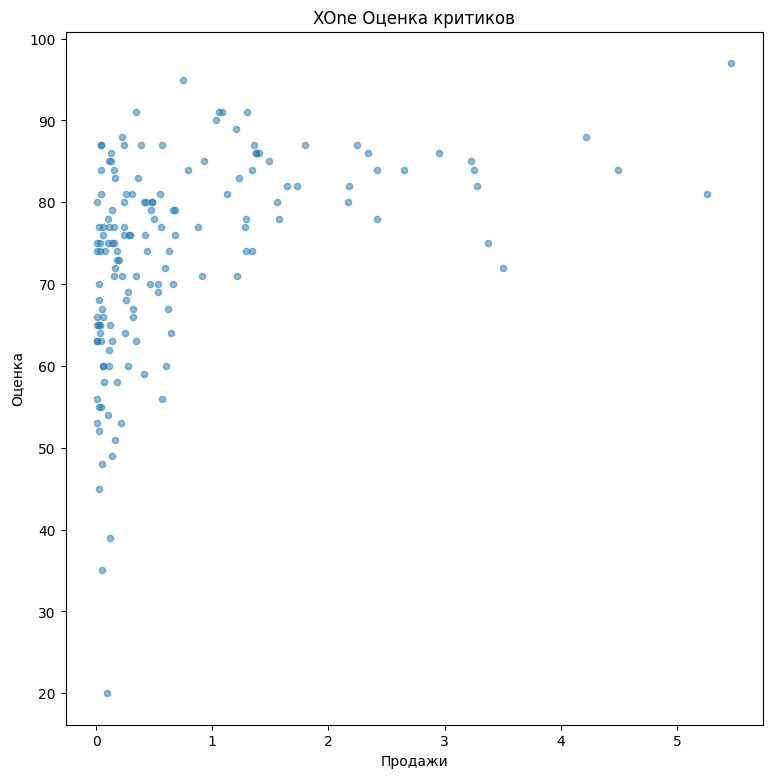

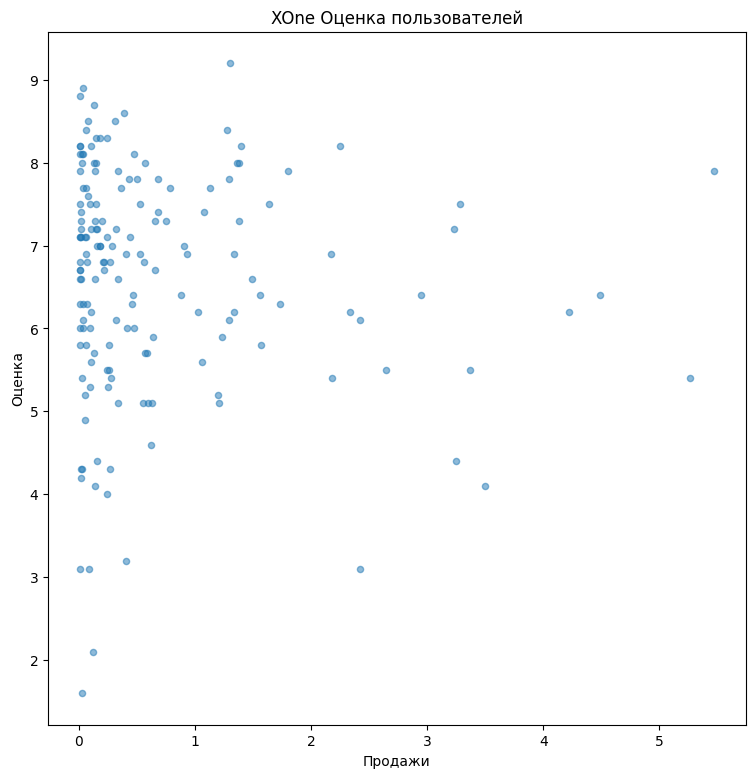

In [19]:
df_actual.query('platform == "XOne"').plot(x='world_sales', y='critic_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'XOne Оценка критиков', figsize=(9, 9), alpha=0.5)
df_actual.query('platform == "XOne"').plot(x='world_sales', y='user_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'XOne Оценка пользователей', figsize=(9, 9), alpha=0.5)
df_actual[corr_list].query('platform == "XOne"').corr()

Аналогично

world_sales  critic_score  user_score
world_sales      1.000000      0.370201    0.407926
critic_score     0.370201      1.000000    0.763536
user_score       0.407926      0.763536    1.000000

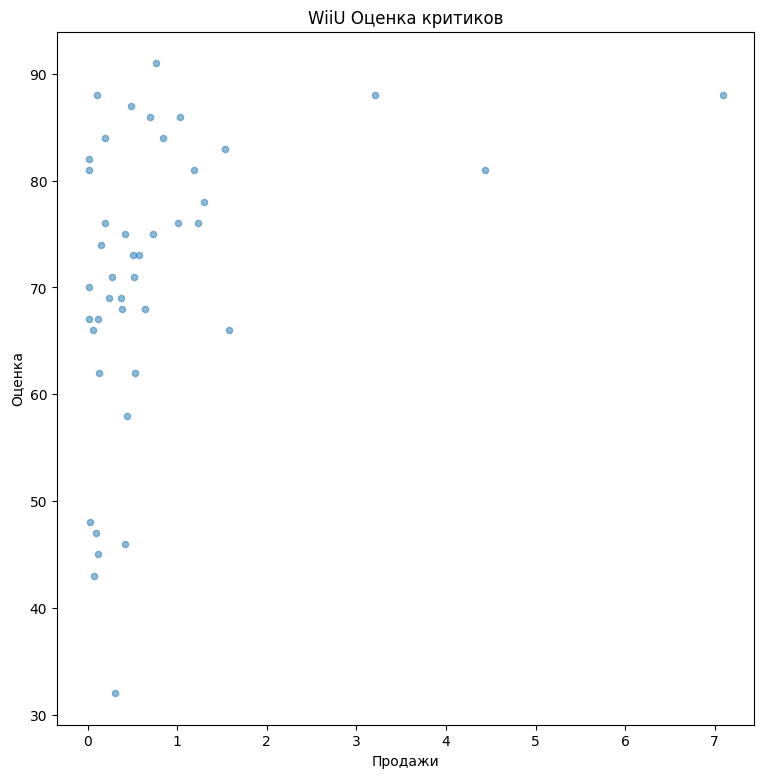

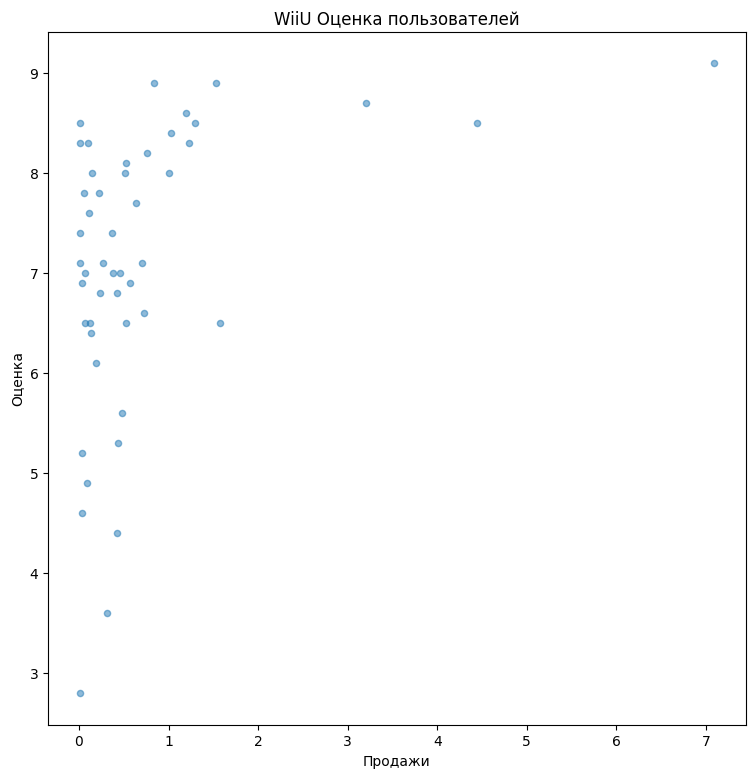

In [20]:
df_actual.query('platform == "WiiU"').plot(x='world_sales', y='critic_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'WiiU Оценка критиков', figsize=(9, 9), alpha=0.5)
df_actual.query('platform == "WiiU"').plot(x='world_sales', y='user_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'WiiU Оценка пользователей', figsize=(9, 9), alpha=0.5)
df_actual[corr_list].query('platform == "WiiU"').corr()

WiiU сама по себе прекрасна, все ей помогают

world_sales  critic_score  user_score
world_sales      1.000000      0.446575   -0.166761
critic_score     0.446575      1.000000    0.693445
user_score      -0.166761      0.693445    1.000000

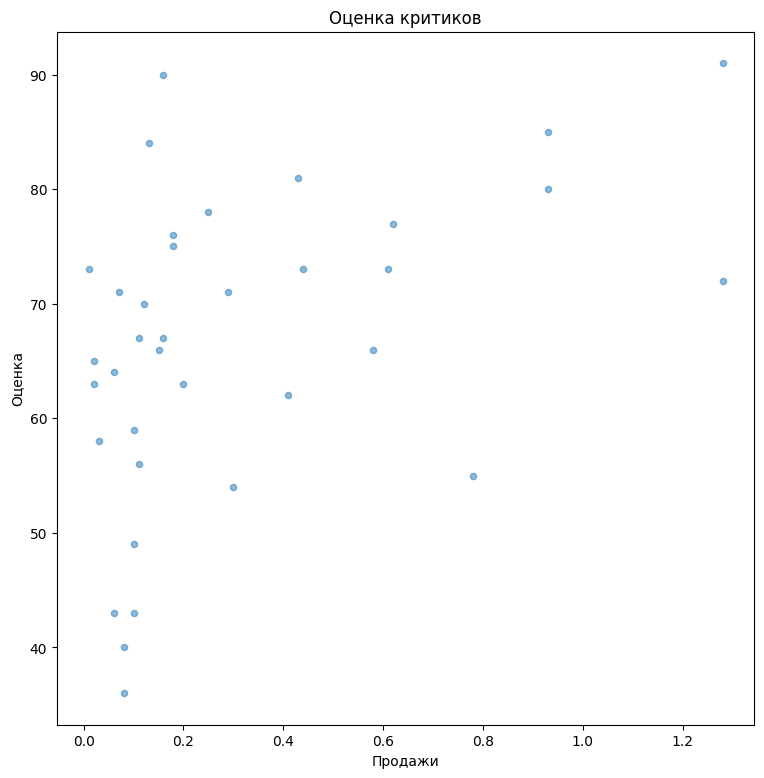

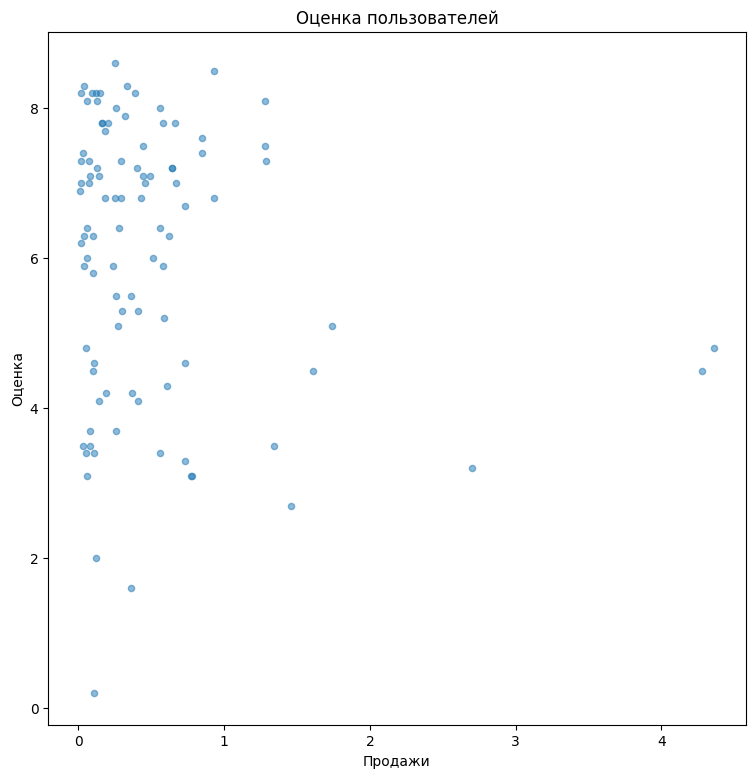

In [21]:
df_actual.query('platform == "PS3"').plot(x='world_sales', y='critic_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'Оценка критиков', figsize=(9, 9), alpha=0.5)
df_actual.query('platform == "PS3"').plot(x='world_sales', y='user_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'Оценка пользователей', figsize=(9, 9), alpha=0.5)
df_actual[corr_list].query('platform == "PS3"').corr()

Тут считаем, что паритет. Оценки критиков и пользоваталей одинаково влияют на продажи

world_sales  critic_score  user_score
world_sales      1.000000      0.525723   -0.138445
critic_score     0.525723      1.000000    0.625309
user_score      -0.138445      0.625309    1.000000

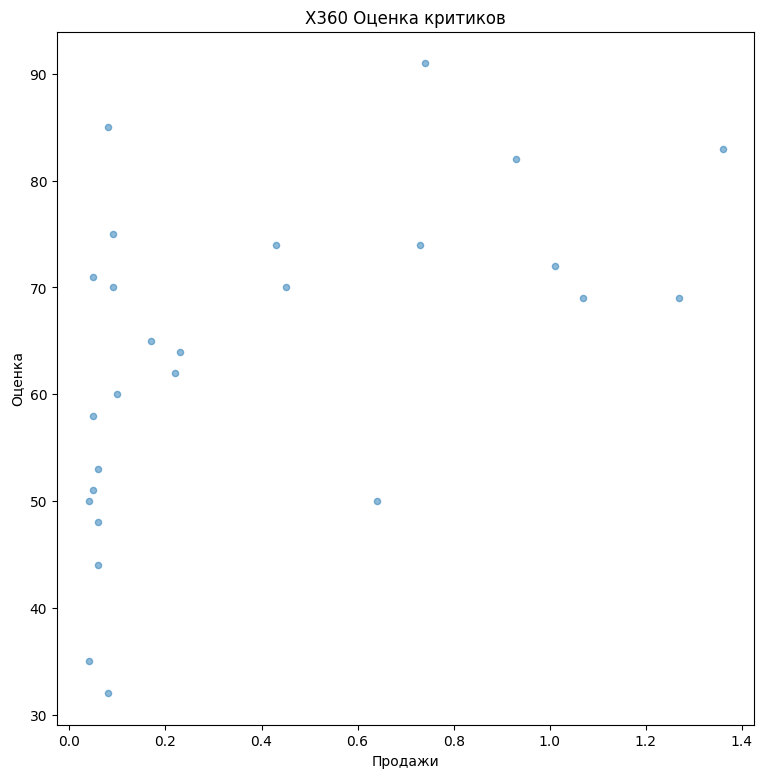

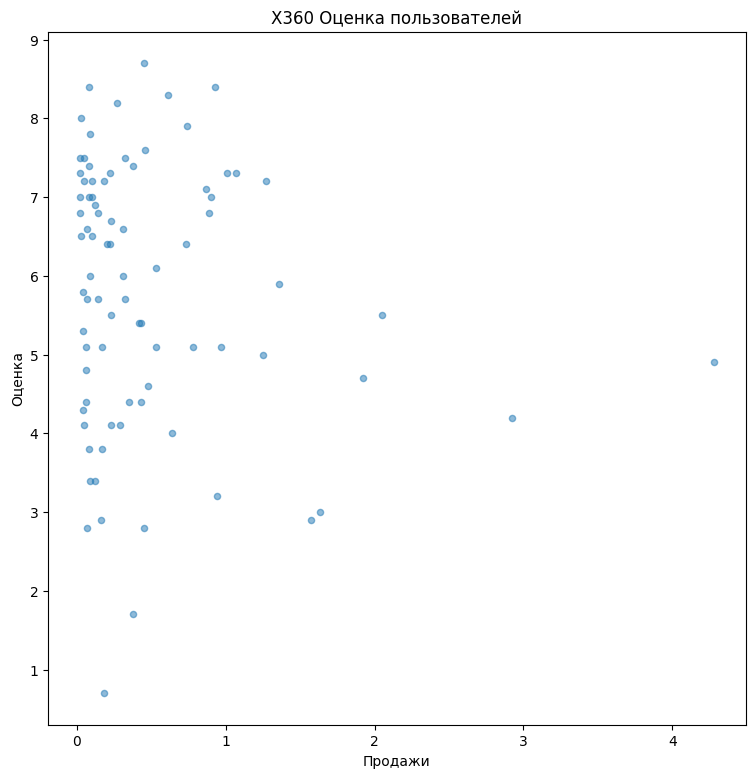

In [22]:
df_actual.query('platform == "X360"').plot(x='world_sales', y='critic_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'X360 Оценка критиков', figsize=(9, 9), alpha=0.5)
df_actual.query('platform == "X360"').plot(x='world_sales', y='user_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'X360 Оценка пользователей', figsize=(9, 9), alpha=0.5)
df_actual[corr_list].query('platform == "X360"').corr()

Классика. Двигатель продаж - критики

world_sales  critic_score  user_score
world_sales      1.000000      0.174634   -0.071597
critic_score     0.174634      1.000000    0.466099
user_score      -0.071597      0.466099    1.000000

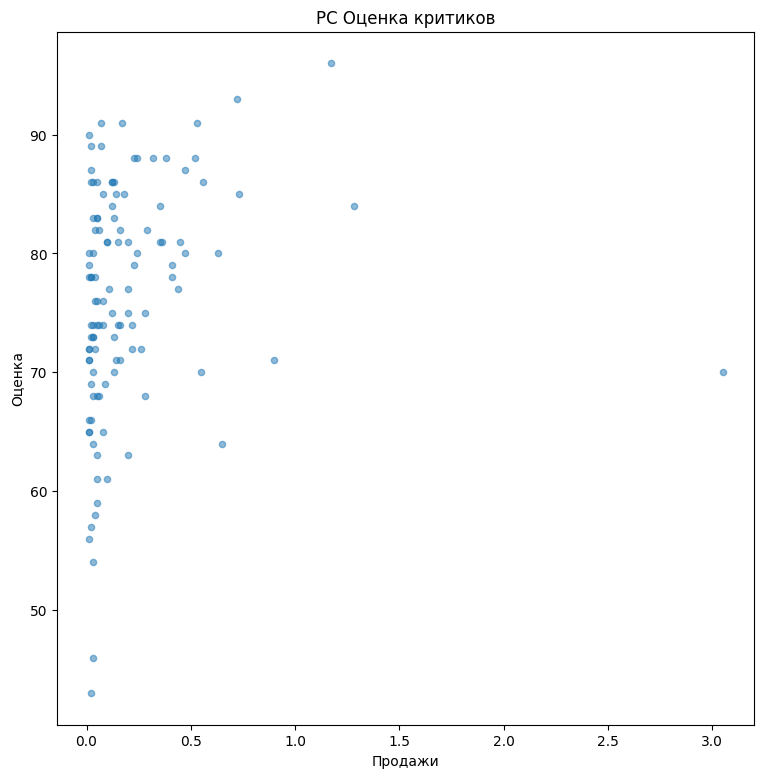

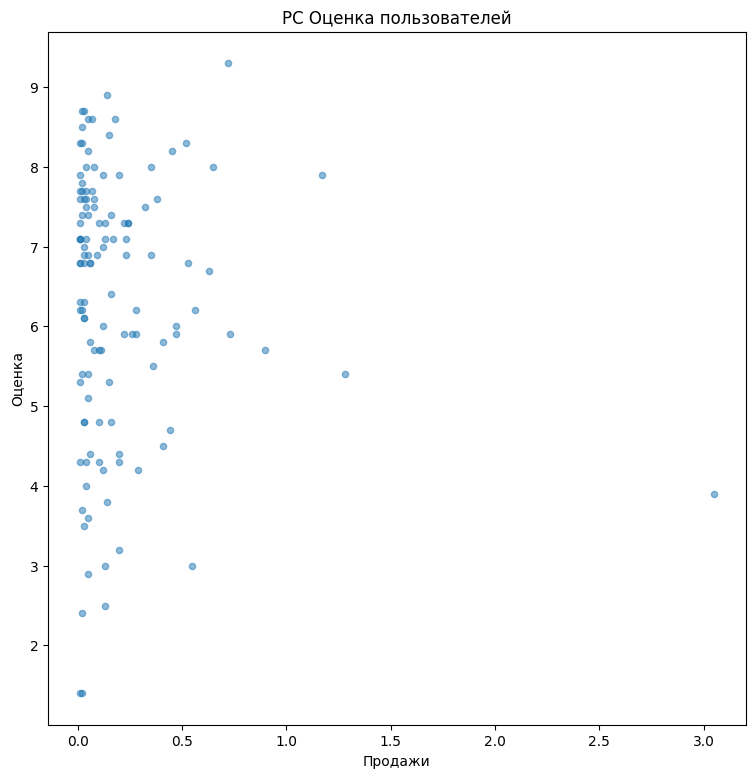

In [23]:
df_actual.query('platform == "PC"').plot(x='world_sales', y='critic_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'PC Оценка критиков', figsize=(9, 9), alpha=0.5)
df_actual.query('platform == "PC"').plot(x='world_sales', y='user_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'PC Оценка пользователей', figsize=(9, 9), alpha=0.5)
df_actual[corr_list].query('platform == "PC"').corr()

Владельцы PC также чаще обращают внимание на оценки критиков, чем на оценки пользователей

world_sales  critic_score  user_score
world_sales      1.000000      0.042665   -0.168455
critic_score     0.042665      1.000000    0.524066
user_score      -0.168455      0.524066    1.000000

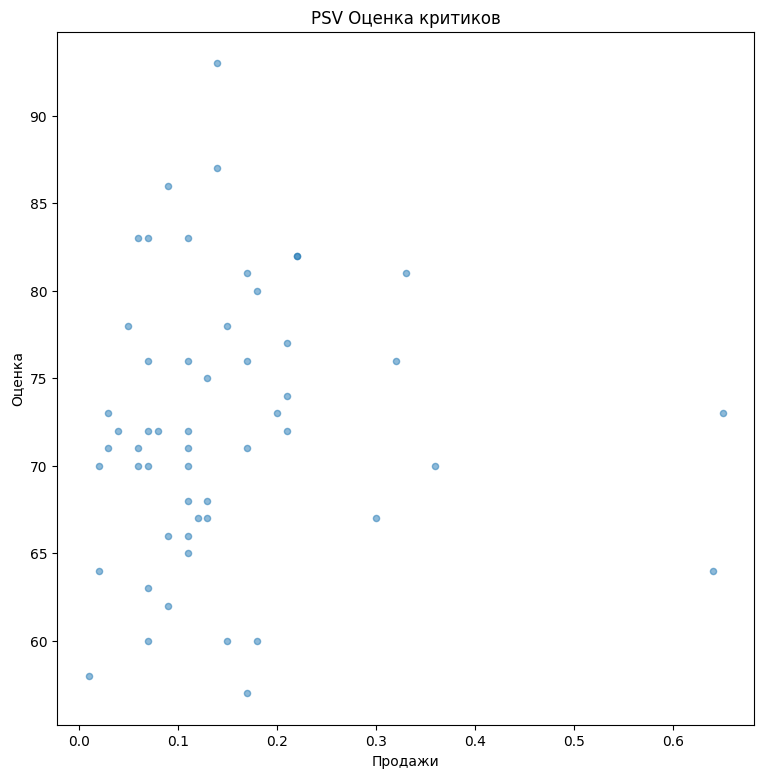

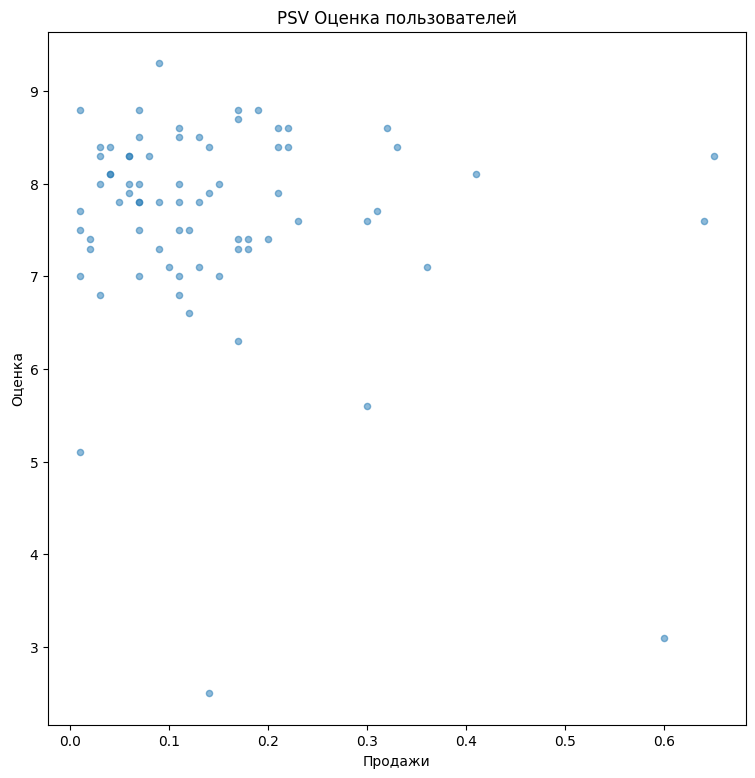

In [24]:
df_actual.query('platform == "PSV"').plot(x='world_sales', y='critic_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'PSV Оценка критиков', figsize=(9, 9), alpha=0.5)
df_actual.query('platform == "PSV"').plot(x='world_sales', y='user_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'PSV Оценка пользователей', figsize=(9, 9), alpha=0.5)
df_actual[corr_list].query('platform == "PSV"').corr()

PSV критики не помогли, всё порешали юзеры

В среднем, пользователи чаще обращают внимание на оценки критиков, чем на оценки пользователей. Разработчикам необходимо завоёвывать лояльность критиков, но примеры из будущего подсказывают, что это не всегда помогает...

world_sales  critic_score  user_score
world_sales      1.000000      0.328105    -0.01307
critic_score     0.328105      1.000000     0.50446
user_score      -0.013070      0.504460     1.00000

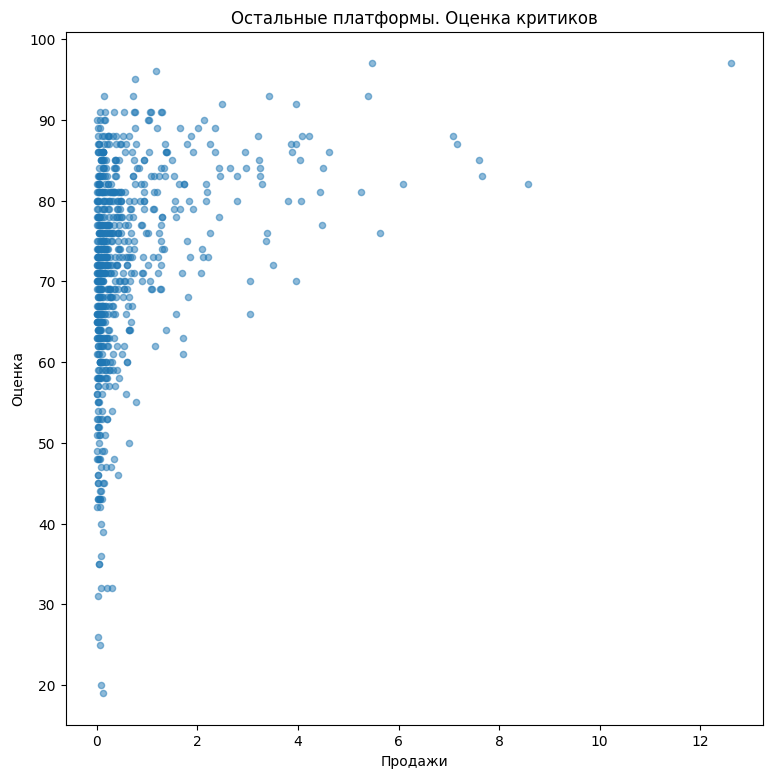

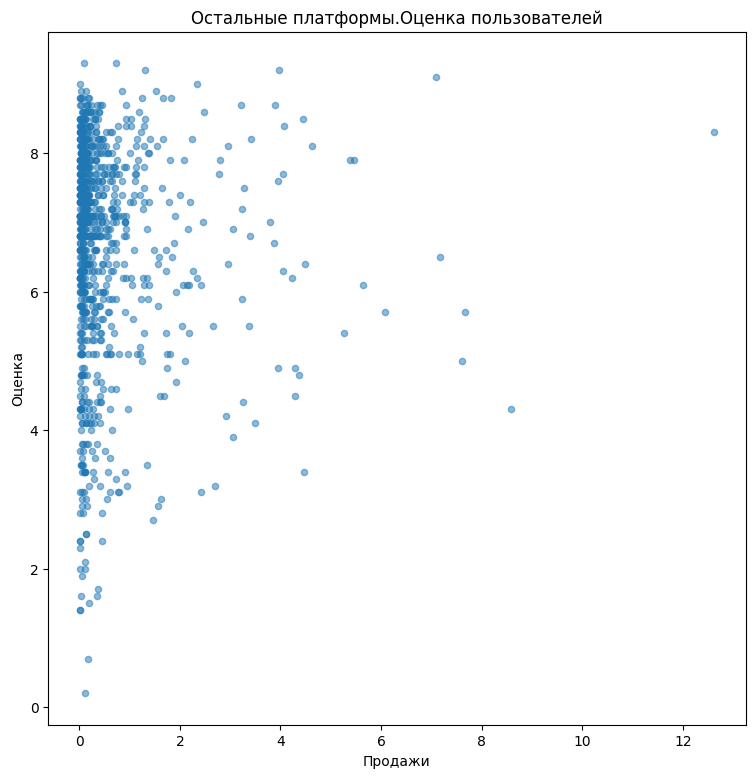

In [25]:
# а как обстоят дела на других платформах?
df_actual.plot(x='world_sales', y='critic_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'Остальные платформы. Оценка критиков', figsize=(9, 9), alpha=0.5)
df_actual.plot(x='world_sales', y='user_score', kind='scatter', xlabel = 'Продажи', ylabel = 'Оценка', title = 'Остальные платформы.Оценка пользователей', figsize=(9, 9), alpha=0.5)
df_not_actual[corr_list].corr()

На других платформах дела обстоят похожим образом. Оценкам критиков отдают большее предпочтение при покупке той или иной игры

### Распределение игр по жанрам

<AxesSubplot:xlabel='genre'>

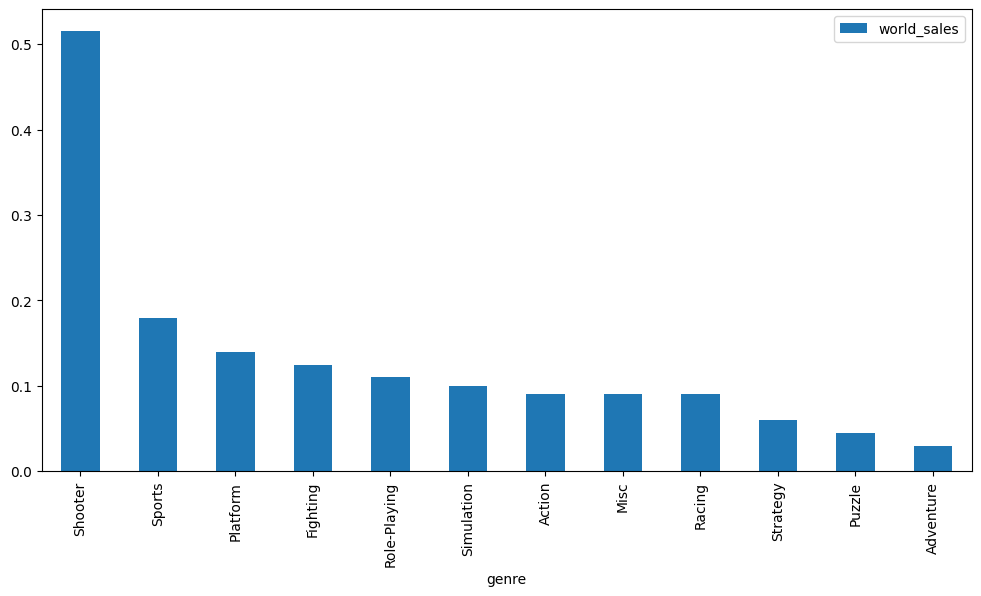

In [26]:
df_actual.pivot_table(index='genre', values='world_sales', aggfunc='median').sort_values(by='world_sales', ascending=False).plot(y='world_sales', kind='bar', figsize=(12, 6))

В целом, самыми популярными жанрами явлются Shooter, Sports, Misc. Наимение популярными - Strategy, Adventure, Puzzle

## Портрет пользователя

### Самые популярные платформы

In [27]:
df.pivot_table(index='platform', values='NA_sales', aggfunc='sum').sort_values(by='NA_sales', ascending=False).head(5)
fig = px.pie(df, values='NA_sales', names='platform', title='Продажи по платформам в NA')
fig.show()

In [28]:
df.pivot_table(index='platform', values='EU_sales', aggfunc='sum').sort_values(by='EU_sales', ascending=False).head(5)
fig = px.pie(df, values='EU_sales', names='platform', title='Продажи по платформам в EU')
fig.show()

In [29]:
df.pivot_table(index='platform', values='JP_sales', aggfunc='sum').sort_values(by='JP_sales', ascending=False).head(5)
fig = px.pie(df, values='JP_sales', names='platform', title='Продажи по платформам в JP')
fig.show()

Различия в платформенных предпочтениях довольно значительные. Ултимативным решением для NA и EU является PS4 и XOne. Японцы вообще фанаты казуальной хрени на портативках и видимо делятся на 2 лагеря: 3DS  и одна и таже хрень на консолях Sony. Вероятно, дело в жанровых предпочтениях данных регионов

### Самые популярные жанры

In [30]:
df.pivot_table(index='genre', values='NA_sales', aggfunc='sum').sort_values(by='NA_sales', ascending=False).head(5)
fig = px.pie(df, values='NA_sales', names='genre', title='Продажи по жанрам в NA')
fig.show()

In [31]:
df.pivot_table(index='genre', values='EU_sales', aggfunc='sum').sort_values(by='EU_sales', ascending=False).head(5)
fig = px.pie(df, values='EU_sales', names='genre', title='Продажи по жанрам в EU')
fig.show()

In [32]:
df.pivot_table(index='genre', values='JP_sales', aggfunc='sum').sort_values(by='JP_sales', ascending=False).head(5)
fig = px.pie(df, values='JP_sales', names='genre', title='Продажи по жанрам в JP')
fig.show()

Если жанровые предпочтения геймеров NA и EU регионов ещё как-то соотносятся, то JP почти полностью ломает стереотипы. Очевидно, что продажи в Японии делают всякие j-RPG, не особо популярные во всё остальном мире

### Рейтинг ESRB

In [33]:
df.pivot_table(index='rating', values='NA_sales', aggfunc='sum').sort_values(by='NA_sales', ascending=False)
fig = px.pie(df, values='NA_sales', names='rating', title='Продажи по рейтингу ESRB в NA')
fig.show()

In [34]:
df.pivot_table(index='rating', values='EU_sales', aggfunc='sum').sort_values(by='EU_sales', ascending=False)
fig = px.pie(df, values='EU_sales', names='rating', title='Продажи по рейтингу ESRB в EU')
fig.show()

In [35]:
df.pivot_table(index='rating', values='JP_sales', aggfunc='sum').sort_values(by='JP_sales', ascending=False)
fig = px.pie(df, values='JP_sales', names='rating', title='Продажи по рейтингу ESRB в JP')
fig.show()

Опять же, в США и Европе, довольно похожее распределение проектов по рейтингам, значит - похожие аудитории. Япония опять всё переворачивает, вероянто и полуярностью там пользуются в основном проекты, рассчитанные на азиатскую аудиторию

### Вывод

Предпочтения по регионам следующие:
* В США и Европе любят жесть в жанре Action и Shooter, с небольшим различием по используемым платформам
* В Японии отдают предпочтение портативному геймингу и играют чаще всего в казуальные проекты и j-RPG

## Проверка гипотез

Вот и настало время проверки гипотез. А проверять мы будем несколько гипотез:
* Имеют ли Билли-бои значительную разницу в рейтингах проектов, в зависимости от выбранной платформы (PC или XBox). Возможно, на одной из этих платформ меньше багов или лучше оптимизация, что мотивирует ставить более высокие оценки
* Имеются ли значительная разница между средними оценками в разных жанрах игр. Иными словами, одинаково ли оценивают пользователи популярные тайтлы, при том, что каждый из популярных жанров имеет совершенно разный технический подтекст, соответственно и требования к его реализации

### Равенство средних пользовательских оценок между платформами
* H0: Средние пользовательские оценки на PC и XOne равны
* H1: Средние пользовательские оценки на PC и XOne неравны

In [36]:
alpha = 0.05 # классика всех статистических исследований

In [37]:
df_actual = df_actual.dropna(axis=0, subset='user_score') # может появиться проблема с расчётом p-value, поэтому избавимся от пропусков
results1 = st.ttest_ind(
    df_actual.query('platform == "XOne"')['user_score'],
    df_actual.query('platform == "PC"')['user_score'],
    equal_var=False)
print ('p-value:', results1.pvalue)
if alpha > results1.pvalue:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    

p-value: 0.11601398086668835
Нет оснований отвергнуть нулевую гипотезу


Таким образом, можем смело утверждать, что средние пользовательские оценки на PC и XOne не имеют статистически значимой разницы, что означает лишь то, что эти платформы предлагают сопоставимый user-experience. Ну, либо геймерам без разницы и они шарят только за сюжетную составляющую. (Все остальные факты и имена персонажей являются совпадением)  

### Равенство средних пользовательских оценок между жанрами

* H0: Средние пользовательские оценки в жанрах Action и Sports равны
* H1: Средние пользовательские оценки на Action и Sports неравны

In [38]:
df_actual = df_actual.dropna(axis=0, subset='user_score') # может появиться проблема с расчётом p-value, поэтому избавимся от пропусков
results2 = st.ttest_ind(
    df_actual.query('genre == "Action"')['user_score'],
    df_actual.query('genre == "Sports"')['user_score'],
    equal_var=False)
print ('p-value:', results2.pvalue)
if alpha > results2.pvalue:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.132579125573844e-14
Отвергаем нулевую гипотезу


In [39]:
display(df_actual.query('genre == "Action"')['user_score'].mean())
df_actual.query('genre == "Sports"')['user_score'].mean()

6.760606060606061

5.232539682539683

Результат весьма ожидаемый, т.к. сравнивать Action и Sports - как сравнивать Землю и Луну. У фанатов каждого жанра абсолютно разный понятийный аппарат, следовательно, и разные критерии при выставлении оценки. Средние рейтинги игр в разных жанрах различаются статистически значимо.

## Общие выводы

Итак, в ходе проекта, мы выяснили несколько любопытных моментов:
* Платформы имеют свойство расцветать и умирать, и происходит это в среднем с периодичностью 8-10 лет
* Обнаружили платформы в самом расцвете сил, что подвтерждается статистикой (и историей тоже, круто жить в будущем без будущего)

 Составили портреты пользователей разных регионов и можем сказать, что: 
* В США и Европе любят жесть в жанре Action и Shooter, с небольшим различием по используемым платформам
* В Японии отдают предпочтение портативному геймингу и играют чаще всего в казуальные проекты и j-RPG

 Также проверили гипотезы и выяснили:
* Средние пользовательские оценки на PC и XOne статистически не различаются
* Средние пользовательские оценки на Action и Sports статитически значимо различаются

Таким образом, при составлении прогноза на 2017 год я бы делал ставку на актуальные платформы и на жанры типа Action в США и Европе. В Японии можно по-прежнему пытаться толкать казуалки на портативные и старые платформы - будет норм.